<a href="https://colab.research.google.com/github/bolaoke/data_analytics_2/blob/main/Unit_3_Python_assignment_with_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [5]:
df.head(7)

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
5,6,AssocProf,B,6,6,Male,97000
6,7,Prof,B,30,23,Male,175000


In [6]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [7]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [8]:
# Mean of all salaries
meansalary = df['salary'].mean()
print(meansalary)


113706.45843828715


In [9]:
# Median of all salaries
mediansalary = df['salary'].median()
print(mediansalary)



107300.0


# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [10]:
new_df = df[['sex', 'salary']]
#new_df.head()
print(new_df)

      sex  salary
0    Male  139750
1    Male  173200
2    Male   79750
3    Male  115000
4    Male  141500
..    ...     ...
392  Male  103106
393  Male  150564
394  Male  101738
395  Male   95329
396  Male   81035

[397 rows x 2 columns]


Finding the Median salary for all males

In [12]:
malemedian = (new_df[new_df['sex'] == 'Male']).median()
#male_df['salary'].median
print(malemedian.to_string())                      

salary    108043.0


Finding the Median salary for all females

In [13]:
femalemedian = (new_df[new_df['sex']== 'Female']).median()

print(femalemedian.to_string()) 

salary    103750.0


Comparing the Mean salary of Males and Females

In [14]:
malemean = (new_df[new_df['sex']=='Male']).mean()
print(malemean.to_string())

salary    115090.418994


In [15]:
femalemean = (new_df[new_df['sex']=='Female']).mean()
print(femalemean.to_string())

salary    101002.410256


In [16]:
# The difference between mean salaries of male and female
compare = malemean - femalemean
print(compare.to_string())


salary    14088.008738


# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [17]:

Exsalary = df[['yrs.service','salary']]
print(Exsalary)

     yrs.service  salary
0             18  139750
1             16  173200
2              3   79750
3             39  115000
4             41  141500
..           ...     ...
392           30  103106
393           19  150564
394           25  101738
395           15   95329
396            4   81035

[397 rows x 2 columns]


In [18]:
 Ex20 = Exsalary[Exsalary['yrs.service']>=20] 
 print(Ex20.count())                          

yrs.service    157
salary         157
dtype: int64


In [19]:
print((Ex20).mean())

yrs.service        31.057325
salary         122520.656051
dtype: float64


In [20]:
Ex20 = Exsalary[Exsalary['yrs.service']<=20]
print(Ex20)

     yrs.service  salary
0             18  139750
1             16  173200
2              3   79750
5              6   97000
8             20  119250
..           ...     ...
390           19  166605
391           19  151292
393           19  150564
395           15   95329
396            4   81035

[250 rows x 2 columns]


Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [21]:
Exless20 = Exsalary[Exsalary['yrs.service']<20]
print((Exless20).mean())

yrs.service         8.820833
salary         107940.504167
dtype: float64


In [22]:
difference = Ex20.mean()[['salary']]- Exless20.mean()[['salary']]
print(difference.to_string())

salary    828.271833


People who have salary of greater than or equal to 200,000

In [23]:
salgreater200k = Exsalary[Exsalary['salary'] >=200000]
print(salgreater200k.count().to_string())

yrs.service    3
salary         3


Your Findings here...


# Rename values, subset columns, etc

In [24]:
clean_df = df
print(clean_df)

     Unnamed: 0      rank discipline  yrs.since.phd  yrs.service   sex  salary
0             1      Prof          B             19           18  Male  139750
1             2      Prof          B             20           16  Male  173200
2             3  AsstProf          B              4            3  Male   79750
3             4      Prof          B             45           39  Male  115000
4             5      Prof          B             40           41  Male  141500
..          ...       ...        ...            ...          ...   ...     ...
392         393      Prof          A             33           30  Male  103106
393         394      Prof          A             31           19  Male  150564
394         395      Prof          A             42           25  Male  101738
395         396      Prof          A             25           15  Male   95329
396         397  AsstProf          A              8            4  Male   81035

[397 rows x 7 columns]


# Create some simple visualizations showing some simple statistics

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


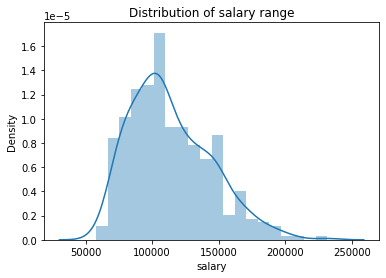

In [25]:
#import pandas as pd
import seaborn as sns

sns.distplot(clean_df['salary'],bins =20)
plt.title('Distribution of salary range')
plt.show()

Text(0.5, 1.0, 'comparison between male and female salary')

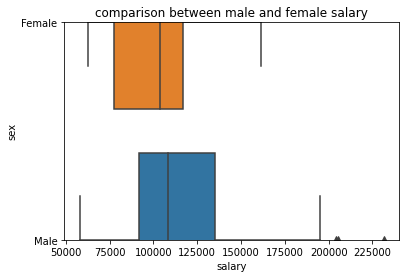

In [26]:
sns.boxplot(x = 'salary', y = 'sex', data = clean_df)
plt.ylim(0,1)
plt.title('comparison between male and female salary')

Your observations from the visuals: 

# Draw some conclusions based on the data.  What did you discover?

1.Three people have salary greater than or equal to 200,000.

2 The difference between mean salary of male and female is 14088.0
3.Over 20 years of experience get salary of 14580.15

4.There is just little difference in female median salary compare to male.Female 103750 Male 108043